In [1]:
from tifffile import imread
import os
from os.path import exists, join
from scipy.ndimage import gaussian_filter
import matplotlib.pyplot as plt
import matplotlib.colors as clr
import numpy as np
import pandas as pd

pd.options.mode.chained_assignment = None  # default='warn'

### Parameters and path

In [7]:
um_per_pixel = 0.117
s_per_frame = 0.03
folder_save = "/Volumes/lsa-nwalter/Guoming_Gao_turbo/Walterlab_server/PROCESSED_DATA/RNA-diffusion-in-FUS/RNAinFUS_PaperFigures/Fig2_diffusion analysis/multi_stage_diffusion_examples/selected_montage"

os.chdir(folder_save)
video = imread("Merged_cropped_3stage_leaving.tif")
df = pd.read_csv("track.csv")
df=df.sort_values("t")

plow = 0.5  # imshow intensity percentile
phigh = 90
scalebar_color = "white"

cmap_color_start = "black"
cmap_color_end = "#B9DBF4"
cmap_name = "dark2blue"
cmap_blue = clr.LinearSegmentedColormap.from_list(
    cmap_name,
    [cmap_color_start, cmap_color_end],
)

cmap_color_start = (0.753, 0.22, 0.188, 0)
cmap_color_end = (0.753, 0.22, 0.188, 1)
cmap_name = "transparent2red"
cmap_red = clr.LinearSegmentedColormap.from_list(
    cmap_name,
    [cmap_color_start, cmap_color_end],
)

scalebar_length_um = 1
scalebar_length_pxl = scalebar_length_um / um_per_pixel
scale_bar_offset = 1

### All Frames but last, no scale bar

In [66]:
for frame in [10, 46, 66, 93, 115, 126, 137]:
    img_blue = video[frame - 1, 1, :, :]
    img_red = video[frame - 1, 0, :, :]
    fig, ax = plt.subplots(1, 1)
    plt.imshow(
        img_blue,
        cmap=cmap_blue,
        vmin=3100,
        vmax=5600,
    )
    plt.imshow(
        img_red,
        cmap=cmap_red,
        vmin=2,
        vmax=6,
    )

    # Add current circle
    current_x = df[df["t"] == frame - 1]["x"].squeeze()
    current_y = df[df["t"] == frame - 1]["y"].squeeze()
    c = plt.Circle(
        (current_x, current_y),
        2.5,
        color="white",
        fill=False,
        lw=3,
    )
    ax.add_patch(c)

    # Add track
    track = df[df["t"] <= frame - 1]
    plt.plot(
        track["x"],
        track["y"],
        color="white",
        lw=2,
        ls="-",
        marker="o",
    )

    plt.xlim(0, img_blue.shape[0])
    plt.ylim(0, img_blue.shape[1])
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.axis("scaled")
    plt.axis("off")

    plt.savefig(
        str(frame) + ".png",
        format="png",
        bbox_inches="tight",
        dpi=300,
        transparent=True,
    )
    plt.close()

### Last frame with scale bar

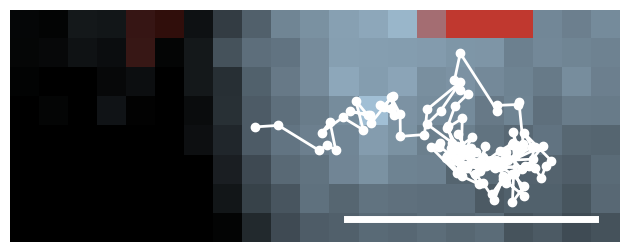

In [80]:
frame = 138
img_blue = video[frame - 1, 1, :, :]
img_red = video[frame - 1, 0, :, :]
fig, ax = plt.subplots(1, 1)
plt.imshow(
    img_blue,
    cmap=cmap_blue,
    vmin=3100,
    vmax=5600,
)
plt.imshow(
    img_red,
    cmap=cmap_red,
    vmin=2,
    vmax=6,
)

# Add track
track = df[df["t"] <= frame - 1]
plt.plot(
    track["x"],
    track["y"],
    color="white",
    lw=2,
    ls="-",
    marker="o",
)

# scale bar
scale_bar_offset = 0
scalebar_length_um = 1
base_x = 11.1
base_y = 6.7
scalebar_length_pxl = scalebar_length_um / um_per_pixel
plt.plot(
    [
        base_x + scale_bar_offset,
        base_x + scale_bar_offset + scalebar_length_pxl,
    ],
    [base_y + scale_bar_offset, base_y + scale_bar_offset],
    "-",
    color="white",
    lw=5,
)

plt.xlim(0, img_blue.shape[0])
plt.ylim(0, img_blue.shape[1])
plt.gca().invert_yaxis()
plt.tight_layout()
plt.axis("scaled")
plt.axis("off")

plt.savefig(
    str(frame) + ".png",
    format="png",
    bbox_inches="tight",
    dpi=300,
    transparent=True,
)